In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math


# Logistic Regression Assignment Solution

## 1. Logistic Regression with 2 Features

1.1 Create your simulated dataset as a normal distribution.

In [2]:
np.random.seed(42)

num_samples = 40

# Class 0 data
x_1 = np.random.multivariate_normal([2, 2], [[1, .75],[.75, 1]], num_samples)
y_1 = np.zeros(num_samples)

# Class 1 data
x_2 = np.random.multivariate_normal([-1, -1], [[1, .75],[.75, 1]], num_samples)
y_2 = np.ones(num_samples)

# Combining the data
X = np.vstack((x_1, x_2))
y = np.hstack((y_1, y_2))

#Adding Bias Column
X = np.insert(X , 0 , np.ones(X.shape[0]) , axis = 1)

print(X)

[[ 1.          1.58425027  1.48648264]
 [ 1.          0.85567048  1.93261522]
 [ 1.          2.30181034  2.13625051]
 [ 1.          0.25145253  0.79411083]
 [ 1.          2.24732913  2.63097702]
 [ 1.          2.59814789  2.26882722]
 [ 1.          2.45011174  1.0972183 ]
 [ 1.          3.81231155  3.41471422]
 [ 1.          2.83631355  3.05851997]
 [ 1.          3.34870351  2.35005399]
 [ 1.          0.70883509  0.54918714]
 [ 1.          2.4405577   1.4331086 ]
 [ 1.          2.47000635  2.54844047]
 [ 1.          2.9438266   3.20948521]
 [ 1.          2.66497536  2.45871673]
 [ 1.          1.90796577  3.21772423]
 [ 1.          2.38658278  1.63866821]
 [ 1.          1.6622131   0.79894628]
 [ 1.          2.49747401  1.11177798]
 [ 1.          3.17280333  3.31200524]
 [ 1.          1.24863993  1.3698156 ]
 [ 1.          2.2146353   2.00172283]
 [ 1.          3.63753404  3.12852732]
 [ 1.          2.05713897  2.80463726]
 [ 1.          2.30190335  1.0552457 ]
 [ 1.          1.83299435

1.2 Plot to see the 2 classes in your dateset.

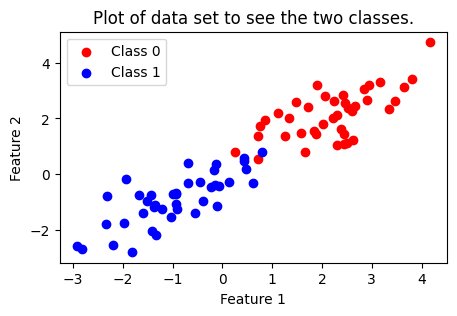

In [3]:
plt.figure(figsize=(5,3))
plt.scatter(x_1[:,0], x_1[:,1], color='red', label='Class 0')
plt.scatter(x_2[:,0], x_2[:,1], color='blue', label='Class 1')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Plot of data set to see the two classes.')
plt.legend()
plt.show()

1.3 Randomize initial values for theta. <font color='red'> Complete the initializeTheta() function and verify the results. </font>

In [4]:
def initializeTheta(X, random_seed):
  random.seed(random_seed)
  # Use random.random() to generate random numbers between -1 and +1. Return a numpy array of theta such that [ theta_0, theta_1, theta_2, ... , theta_n ]
  thetaArray = [2*random.random() - 1 for _ in range(X.shape[1])]
  return np.array(thetaArray)


In [5]:
expected_array = np.array([ 0.2788536 , -0.94997849, -0.44994136])
assert np.allclose( initializeTheta(X,42) , expected_array)

1.4 Write out the prediction function. <font color='red'> Complete the sigmoid() function and the prediction() function and verify the results. </font>

In [6]:
#Adding Bias to the data
def sigmoid(z):
  # Write out the sigmoid function.
  e = math.e
  sig = 1/(1+e ** -z)
  return sig  

def prediction(X, c, m1, m2):
  # Write out the prediction function.
  X = np.array(X)
  m = np.array([c , m1 , m2])
  z = np.dot(m , X.T)
  h = sigmoid(z)
  return h

In [7]:
thetaArray = initializeTheta(X, 42)
print(thetaArray)

theta0 = thetaArray[0]
theta1 = thetaArray[1]
theta2 = thetaArray[2]
h = prediction(X, theta0, theta1, theta2)
assert np.allclose(   h.sum() , 34.49833349468386  )

[ 0.2788536  -0.94997849 -0.44994136]


1.5 Write out the log loss function. <font color='red'> Complete the logLoss() function and verify the results. </font>

In [8]:
def logLoss(h,y):
  # Write out the log loss function and return the loss.
  logloss = [-math.log(h[i]) if y[i] == 1 else -math.log(1 - h[i]) for i in range(len(h))]

  total_loss = np.sum(logloss)/len(h)

  print(total_loss)
  return total_loss

In [9]:
assert np.allclose( logLoss(h,y) , 0.1986619183530933)

0.19866191835309335


1.6 Write out the dJ/dTheta gradient calculation function. <font color='red'> Complete the gradients() function and verify the results. </font>

In [10]:
def gradients(X,y,h):
  # Calculate the gradient and return them as a numpy array [ dTheta_0, dTheta_1, ... , dTheta_n].
  sum_theta = np.dot(X.T , h - y)
  dtheta = sum_theta/len(X)
  return dtheta

In [11]:
dThetaArray = gradients(X,y,h)
expected_array = np.array([-0.06877083,  0.09302227,  0.10442537])
assert np.allclose( dThetaArray , expected_array)

1.7 Update the gradients. <font color='red'> Complete the updateTheta() function and verify the results. </font>

In [12]:
def updateTheta(X, thetaArray, dThetaArray, learning_rate):
  # Calculate the new values for theta and return them as a numpy array [theta_0, theta_1, ... , theta_n].

  thetaArray = thetaArray - learning_rate * dThetaArray
  return thetaArray

In [13]:
theta_updated = updateTheta(X, thetaArray, dThetaArray, 0.01)
expected_array = np.array([ 0.27954131, -0.95090871, -0.45098562])
assert np.allclose( theta_updated , expected_array)

1.8 Putting it all together. <font color='red'> Complete the runLogisticRegression_2Features() function and verify the results. </font>

In [14]:
def runLogisticRegression_2Features(X,y,iterations, learning_rate):
  # Complete this function here to run logistic regression using the functions you have previously created.
  # Return the values of the final model loss and theta array
  thetaArray = initializeTheta(X , 42)
  
  for _ in range(iterations):
    h = prediction(X , thetaArray[0] , thetaArray[1] , thetaArray[2])
    dtheta = gradients(X , y , h)
    thetaArray = updateTheta(X , thetaArray , dtheta , learning_rate)
  
  loss = logLoss(h , y)
  
  return loss, thetaArray

In [15]:
loss, thetaArray = runLogisticRegression_2Features(X,y,100, 0.01)
assert np.allclose( loss , 0.17925482550218486 )

0.1792548255021849


1.9 Plot the results. <font color='red'> To plot the result including the decision boundary you have to complete the calFeature2Values() function and verify the results. </font>

In [16]:
def calFeature2Values(x_values, c, m1, m2):
  # Calculate the feature2_val and return it
  feature2_val = -((m1/m2)*x_values.T) - c/m2
  print(feature2_val)
  return feature2_val

def plotResult2D( x_1,x_2, c,m1,m2):
  plt.figure(figsize=(5,3))
  plt.scatter(x_1[:,0], x_1[:,1], color='red', label='Class 0')
  plt.scatter(x_2[:,0], x_2[:,1], color='blue', label='Class 1')

  # Decision boundary
  x_values = np.linspace(-4, 4, 100)
  y_values = calFeature2Values(x_values, c, m1, m2)
  plt.plot(x_values, y_values, label='Decision Boundary', color='green')

  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.title('Logistic Regression using Gradient Descent')
  plt.legend()
  plt.show()

[ 8.24877052  8.09504064  7.94131076  7.78758088  7.633851    7.48012112
  7.32639124  7.17266136  7.01893148  6.8652016   6.71147172  6.55774184
  6.40401196  6.25028208  6.0965522   5.94282232  5.78909244  5.63536255
  5.48163267  5.32790279  5.17417291  5.02044303  4.86671315  4.71298327
  4.55925339  4.40552351  4.25179363  4.09806375  3.94433387  3.79060399
  3.63687411  3.48314423  3.32941435  3.17568447  3.02195459  2.86822471
  2.71449483  2.56076495  2.40703507  2.25330519  2.09957531  1.94584543
  1.79211555  1.63838567  1.48465579  1.33092591  1.17719603  1.02346615
  0.86973627  0.71600639  0.56227651  0.40854663  0.25481675  0.10108687
 -0.05264301 -0.20637289 -0.36010277 -0.51383265 -0.66756253 -0.82129241
 -0.97502229 -1.12875217 -1.28248205 -1.43621193 -1.58994181 -1.74367169
 -1.89740157 -2.05113145 -2.20486133 -2.35859121 -2.51232109 -2.66605097
 -2.81978085 -2.97351073 -3.12724061 -3.28097049 -3.43470037 -3.58843025
 -3.74216013 -3.89589001 -4.04961989 -4.20334977 -4

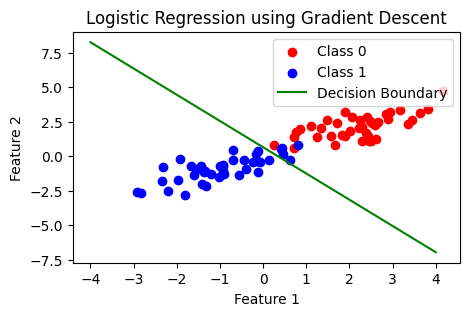

In [17]:
plotResult2D(x_1, x_2, thetaArray[0], thetaArray[1], thetaArray[2])

## 2. Logistic Regression Multiple Features

2.1 Prepare the data. We will just use the same data as before but this time we will pad a set of ones to the matrix. <font color='red'> Modify the X matrix so that it is in a suitable format for matrix formulation with n features. </font>

In [18]:
# Use the same data as before but pad ones to the X matrix

# Modify your X and overwrite the result.

print("It is already inserted in the section 1.1")

It is already inserted in the section 1.1


In [19]:
assert X[:,0].mean() == 1

2.2 Initialize theta but this time we will alter the code slightly to account for the differnt X. <font color='red'> Complete the initializeTheta_nFeatures() function and verify the results. </font>

In [20]:
def initializeTheta_nFeatures(X, random_seed):
  random.seed(random_seed)

  # Calculate random values for theta array between -1 and +1. Use random.random()
  # Return theta valuese in a numpy array of format [ theta_0, theta_1, ... , theta_n ]

  theta = [2*random.random() - 1 for _ in range(X.shape[1])]
  return theta


In [21]:
thetaArray = initializeTheta_nFeatures(X,42)
expected_array = np.array([ 0.2788536 , -0.94997849, -0.44994136])
assert np.allclose( thetaArray , expected_array)

2.3 Make prediction using matrix multiplication. <font color='red'> Complete the prediction_nFeatures() function and verify the results. </font>

In [22]:
def prediction_nFeatures(X, thetaArray):
  # Write prediction function using matrix operations.

  e = math.e
  X = np.array(X)
  h = 1/(1+e ** -np.dot(thetaArray , X.T))
  
  return h

In [23]:
h = prediction_nFeatures(X, thetaArray)
assert np.allclose( h.sum() , 34.49833349468386 )

2.4 Calculate and verify the loss.

In [24]:
loss = logLoss(h,y)
assert np.allclose( loss , 0.19866191835309333 )

0.19866191835309335


2.5 Calculate the gradients. <font color='red'> Complete the gradients_nFeatures() function and verify the results. </font>

In [25]:
def gradients_nFeatures(X,y,h):
  # Write gradients function using matrix operations.
  sum_theta = np.dot(X.T , h - y)
  dtheta = sum_theta/len(X)
  return dtheta

In [26]:
dThetaArray = gradients_nFeatures(X,y,h)
expected_array = np.array([-0.06877083,  0.09302227,  0.10442537])
assert np.allclose( dThetaArray , expected_array)

2.6 Do gradient descent by updating the thetas and verify the results.

In [27]:
learning_rate = 0.01
theta_updated = updateTheta(X, thetaArray, dThetaArray, learning_rate)
expected_array = np.array([ 0.27954131, -0.95090871, -0.45098562])
assert np.allclose( theta_updated , expected_array)

2.8 Put it all together. <font color='red'> Complete the runLogisticRegression_nFeatures() function and verify the results. </font>

In [28]:
def runLogisticRegression_nFeatures(X,y,iterations, learning_rate):
  # Complete this function here to run logistic regression using the functions you have previously created.
  # Return the values of the final model loss and theta array
  thetaArray = initializeTheta_nFeatures(X , 42)
  
  for _ in range(iterations):
    h = prediction_nFeatures(X , thetaArray)
    dtheta = gradients_nFeatures(X , y , h)
    thetaArray = updateTheta(X , thetaArray , dtheta , learning_rate)

  loss = logLoss(h , y)
  return loss, thetaArray

In [29]:
loss, thetaArray = runLogisticRegression_nFeatures(X,y, 100, 0.01)
assert np.allclose( loss,  0.17925482550218486 )

0.1792548255021849


[ 8.24877052  8.09504064  7.94131076  7.78758088  7.633851    7.48012112
  7.32639124  7.17266136  7.01893148  6.8652016   6.71147172  6.55774184
  6.40401196  6.25028208  6.0965522   5.94282232  5.78909244  5.63536255
  5.48163267  5.32790279  5.17417291  5.02044303  4.86671315  4.71298327
  4.55925339  4.40552351  4.25179363  4.09806375  3.94433387  3.79060399
  3.63687411  3.48314423  3.32941435  3.17568447  3.02195459  2.86822471
  2.71449483  2.56076495  2.40703507  2.25330519  2.09957531  1.94584543
  1.79211555  1.63838567  1.48465579  1.33092591  1.17719603  1.02346615
  0.86973627  0.71600639  0.56227651  0.40854663  0.25481675  0.10108687
 -0.05264301 -0.20637289 -0.36010277 -0.51383265 -0.66756253 -0.82129241
 -0.97502229 -1.12875217 -1.28248205 -1.43621193 -1.58994181 -1.74367169
 -1.89740157 -2.05113145 -2.20486133 -2.35859121 -2.51232109 -2.66605097
 -2.81978085 -2.97351073 -3.12724061 -3.28097049 -3.43470037 -3.58843025
 -3.74216013 -3.89589001 -4.04961989 -4.20334977 -4

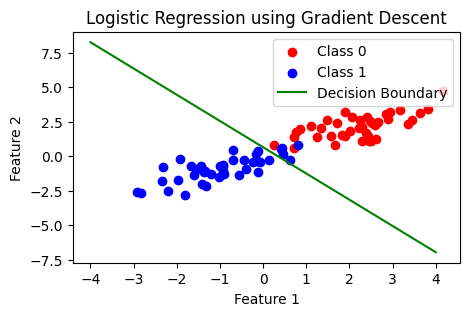

In [30]:
plotResult2D(x_1, x_2, thetaArray[0], thetaArray[1], thetaArray[2])

## 3. Logistic Regression with Advertisment Click Binary Classification

In [31]:
# Download CSV file from this link https://www.kaggle.com/datasets/gabrielsantello/advertisement-click-on-ad/data

3.1 Load your data set into a pandas data frame.

In [32]:
df = pd.read_csv('dataset\\advertising.csv')

In [33]:
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


3.2 Normalize the data by scaling it to standard deviation of 1. <font color='red'> Complete the normalize() function and verify the results. Do not use any other libray to help other than pandas. </font>

In [34]:
def normalize(df_column):
  # Write the function that normalizes a column of a pandas dataframe
  # We want to normalize the column such that it has a resulting standard deviation of 1
  # return the scaled dataframe column
  norm = (df_column - df_column.mean())/df_column.std()
  return norm


In [35]:
df[['Daily Time Spent on Site']] = normalize( df[['Daily Time Spent on Site']] )
df[['Age']] = normalize( df[['Age']] )
df[['Area Income']] = normalize( df[['Area Income']] )
df[['Daily Internet Usage']] = normalize( df[['Daily Internet Usage']] )

print(df['Daily Time Spent on Site'].std())

1.0


In [36]:
assert df['Daily Time Spent on Site'].std() == 1
assert df['Age'].std() == 1
assert df['Area Income'].std() == 1
assert df['Daily Internet Usage'].std() == 1

3.3 Prepare the test and train dataset. Choose wisely which columns to the model train on. <font color='red'> Your task is to train the model such that accuracy > 0.7 in both the train and test data set. </font>

In [37]:
from sklearn.model_selection import train_test_split
# Choose your y here
y = df["Clicked on Ad"]
# Choose your x here
X = pd.concat([df['Daily Time Spent on Site'] , df['Age'] , df['Area Income'] , df['Daily Internet Usage']] , axis = 1)

# Split the data into training and testing sets
df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
X = df_X_train.to_numpy()
y = df_y_train.to_numpy()

In [39]:
X = np.hstack((np.ones(( len(X), 1)), X))

print(X)

[[ 1.          0.695097   -1.59454791 -0.65749316  0.6792326 ]
 [ 1.          0.86792825 -0.45631684  1.11913824  0.63823251]
 [ 1.          0.53551195  0.22662181  0.90441975  1.46301771]
 ...
 [ 1.          1.66333046  1.02338356 -0.22956348  0.06035897]
 [ 1.         -0.52607561  0.68191423  1.31829462 -0.9243266 ]
 [ 1.          1.5712379   0.45426802  0.34242902  0.32412624]]


3.4 Train the model. <font color='red'> Choose your training parameters. </font>

In [40]:
learning_rate = 0.0005# Choose your learning rate
iterations = 5000# Choose your iterations
loss, thetaArray = runLogisticRegression_nFeatures(X,y, iterations, learning_rate )

0.28359305568206933


3.5 Make predictions with train dataset.

In [41]:
print(thetaArray)
h = prediction_nFeatures(X, thetaArray)

[ 0.18978405 -1.29365875  0.02101637 -0.73726022 -0.19084498]


3.6 Find the prediction accuracy of the train data set. We will choose a threshold of 0.5 for our predictions meaning that predictions equal to or greater than 0.5 will be classed as a positive prediction. Otherwise the prediction is negative. <font color='red'> Complete the accuracy() function and verify your results. </font>

In [42]:
def accuracy(h,y):
  # accurcy is the percentage of predictions the model got correct
  # outputs the accuracy in decimals where by accuracy of 1 is 100% and 0 is 0%
  acc = [1 if h[i] >= 0.5 and y[i] == 1 else 1 if h[i] < 0.5 and y[i] == 0 else 0 for i in range(len(h))]
  res = sum(acc) / len(acc)
  return res

In [43]:
# verify that your accuracy function is correct

h_temp = np.array([ 0.2, 0.4, 0.5, 0.6, 0.8, 0.9])
y_temp =  np.array([ 0, 0, 1, 0, 1, 0])
assert accuracy(h_temp, y_temp) == 2/3

<font color='red'> Make sure your model training set accuracy > 80%. </font>

In [44]:
accuracy(h,y)

0.92125

In [45]:
# Verify that the model accuracy for the train dataset is greater than 80%

assert accuracy(h,y) > 0.8

3.7 Apply model on test data set and find the accuracy.

In [46]:
X = df_X_test.to_numpy()
y = df_y_test.to_numpy()

In [47]:
X = np.hstack((np.ones(( len(X), 1)), X))

In [48]:
h = prediction_nFeatures(X, thetaArray)

In [49]:
loss = logLoss(h,y)
loss

0.3118283863867498


0.3118283863867498

<font color='red'> Make sure your model testing set accuracy > 80%. </font>

In [50]:
accuracy(h,y)

0.885

In [51]:
# Verify that the model accuracy for the test dataset is greater than 80%

assert accuracy(h,y) > 0.8

Conclusion: The model performance is slightly worse off in the test dataset compared to the train dataset suggesting that the results are adequate.